# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

C:\Software\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Software\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Software\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,✅ Trip Verified | London Heathrow to Gibralta...
2,✅ Trip Verified | First time flying British Ai...
3,Not Verified | I flew London to Cairo and ret...
4,Not Verified | Absolutely the worst experienc...


In [4]:
df.to_csv("C:/Users/Chloe/Documents/Jupyter/project/BA/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Cleaning
After getting the row dataset, the first thing to do is to get an overview of the data attributes.

In [5]:
import csv
path = "BA_reviews.csv"
df = pd.read_csv(path,header=0)
df.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,1,✅ Trip Verified | London Heathrow to Gibralta...
2,2,✅ Trip Verified | First time flying British Ai...
3,3,Not Verified | I flew London to Cairo and ret...
4,4,Not Verified | Absolutely the worst experienc...


In [6]:
df.columns = ['Verified','reviews']
df.head()

,Verified,reviews
0,0,✅ Trip Verified | 1. Ground crew in Heathrow...
1,1,✅ Trip Verified | London Heathrow to Gibralta...
2,2,✅ Trip Verified | First time flying British Ai...
3,3,Not Verified | I flew London to Cairo and ret...
4,4,Not Verified | Absolutely the worst experienc...


In [7]:
total = len(df)

for i in range(total):
    if 'Trip Verified'in df['reviews'].str.split('|')[i][0]:
        df['Verified'][i] = 'Trip Verified'
    else:
        df['Verified'][i] = 'Not Verified'
        
    df['reviews'][i] = df['reviews'].str.split('|')[i][1]
    df['reviews'][i] = df['reviews'][i].encode('gbk',errors='ignore').decode('gbk').encode('utf-8').decode('utf-8')
df.head()

<ipython-input-7-0bc07330ff90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Verified'][i] = 'Trip Verified'
C:\Software\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Verified,reviews
0,Trip Verified,1. Ground crew in Heathrow left 60 passenge...
1,Trip Verified,London Heathrow to Gibraltar on 24th October...
2,Trip Verified,First time flying British Airways and I would...
3,Not Verified,I flew London to Cairo and return in October...
4,Not Verified,Absolutely the worst experience ever. Flew ...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Verified  1000 non-null   object
 1   reviews   1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [9]:
df['Verified'].value_counts()

Trip Verified    784
Not Verified     216
Name: Verified, dtype: int64

## Data Analysis

### WordCloud and Topic Modeling

First, I will conduct a comprehensive review of the comments highlighted in the word cloud, employing detailed topic modeling techniques to discern the specific areas and topics that customers have expressed their opinions on regarding their flights.

In [10]:
import re
from wordcloud import WordCloud
df['R_processed'] = df['reviews'].map(lambda x: re.sub('[,\.!?]', '', x))

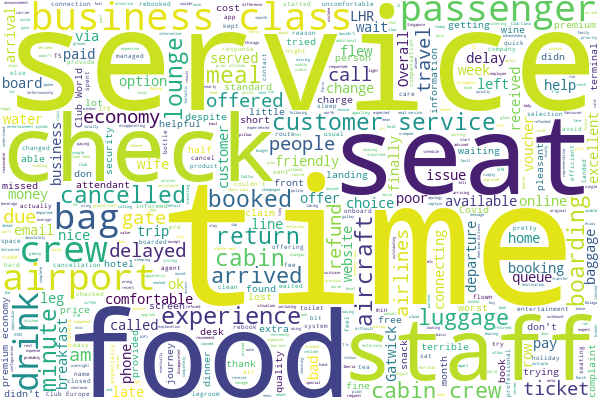

In [11]:
# Join the different processed titles together.
long_string = ','.join(list(df['R_processed'].values))
#Add stop words for wordcloud
with open('stopwords.txt', encoding='utf-8') as f:
    con = f.readlines()
    stop = list()
    for i in con:
        i = i.replace("\n", "")   
        stop.append(i)

custom_stop_words = ['ba','BA','british','British', 'Airway','flight','hour','flights','hours','flying','airline','airways','Airways','told','fly','day','days','London','london','heathrow','Heathrow','seats','plane']
swords = list(stop+custom_stop_words)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", width =600,height = 400, stopwords= swords, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Software\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['airway'] not in stop_words.
  warnings.warn(
C:\Software\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


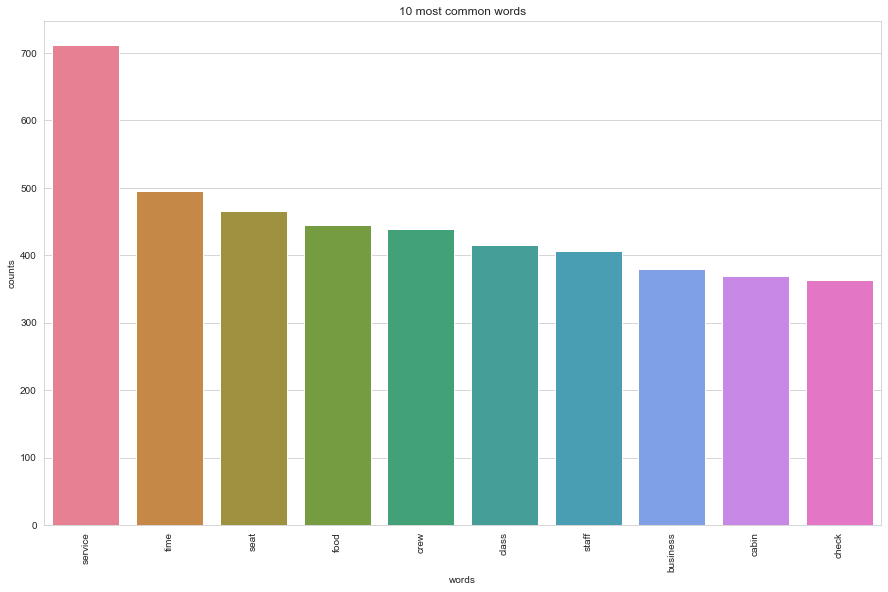

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=swords)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['R_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [13]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 5
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
service food crew seat cabin class business time staff economy

Topic #1:
service airport customer time check cancelled delayed booked minutes arrived

Topic #2:
luggage bag staff airport check found online help arrived sent

Topic #3:
service refund call customer voucher cancelled time booked phone return

Topic #4:
business class check boarding seat paid lounge booked 10 food


### Sentiment Analysis

In the word cloud, prominent terms such as 'cancelled,' 'late,' 'poor,' and 'delayed' stand out, but it's noteworthy that 'pretty' and 'available' are also highlighted. Consequently, it is imperative to delve deeper into the polarity of customer reviews, encompassing both positive and negative aspects.

In [14]:
from textblob import TextBlob
df['Polarity']=''
df['Subjectivity']=''
for i in range(total):
    se = TextBlob(str(df['R_processed'][i])).sentiment
    df['Polarity'][i]= se[0]
    df['Subjectivity'][i]= se[1]
    
df.head()

,Verified,reviews,R_processed,Polarity,Subjectivity
0,Trip Verified,1. Ground crew in Heathrow left 60 passenge...,1 Ground crew in Heathrow left 60 passenger...,-0.085625,0.326875
1,Trip Verified,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on 24th October...,0.076515,0.507064
2,Trip Verified,First time flying British Airways and I would...,First time flying British Airways and I would...,0.448942,0.596825
3,Not Verified,I flew London to Cairo and return in October...,I flew London to Cairo and return in October...,0.279167,0.568627
4,Not Verified,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew i...,-0.003075,0.532888


C:\Software\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


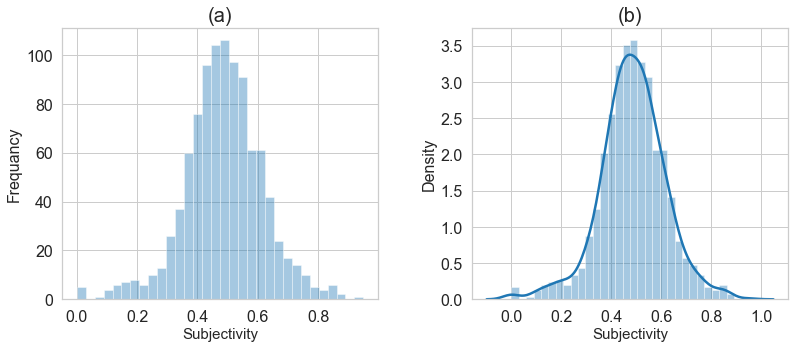

In [15]:
plt.rcParams['figure.figsize'] = (13, 5)    #setting figure size
f = plt.figure()                            

f.add_subplot(1,2,1)
sns.distplot(df['Subjectivity'], kde=False)                 
plt.ylabel('Frequancy', fontsize=16)
plt.xticks(fontsize=16)                    #x-axis font size
plt.yticks(fontsize=16)                   #y-axis font size
plt.title("(a)", fontsize=20)             #subtitle

f.add_subplot(1,2,2)
sns.distplot(df['Subjectivity'])                           
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)                  
plt.yticks(fontsize=16)                  
plt.title("(b)", fontsize=20)            

plt.subplots_adjust(wspace=0.3)         #set up figure distance
plt.show()

C:\Software\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


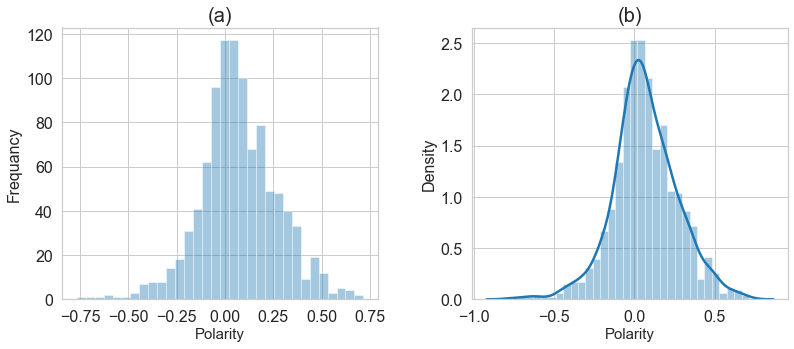

In [16]:
plt.rcParams['figure.figsize'] = (13, 5)    
f = plt.figure()                            

f.add_subplot(1,2,1)
sns.distplot(df['Polarity'], kde=False)                 
plt.ylabel('Frequancy', fontsize=16)
plt.xticks(fontsize=16)                    
plt.yticks(fontsize=16)                   
plt.title("(a)", fontsize=20)            

f.add_subplot(1,2,2)
sns.distplot(df['Polarity'])                           
plt.ylabel("Density", fontsize=16)
plt.xticks(fontsize=16)                  
plt.yticks(fontsize=16)                  
plt.title("(b)", fontsize=20)            

plt.subplots_adjust(wspace=0.3)         
plt.show()

In [17]:
# def standardization(data):
#     mu = np.mean(data, axis=0)
#     sigma = np.std(data, axis=0)
#     return (data - mu) / sigma

# df['Polarity']=standardization(df['Polarity'])

In [28]:
df['Label']=''
for i in range(total):
    if df['Polarity'][i]<= 0.16 and df['Polarity'][i]>=-0.075:
        df['Label'][i]= 'Neutral'
    elif df['Polarity'][i]>0.16:
        df['Label'][i]= 'Positive'
    else:
        df['Label'][i]= 'Negative'
    
df.head()

,Verified,reviews,R_processed,Polarity,Subjectivity,Label
0,Trip Verified,1. Ground crew in Heathrow left 60 passenge...,1 Ground crew in Heathrow left 60 passenger...,-0.085625,0.326875,Negative
1,Trip Verified,London Heathrow to Gibraltar on 24th October...,London Heathrow to Gibraltar on 24th October...,0.076515,0.507064,Neutral
2,Trip Verified,First time flying British Airways and I would...,First time flying British Airways and I would...,0.448942,0.596825,Positive
3,Not Verified,I flew London to Cairo and return in October...,I flew London to Cairo and return in October...,0.279167,0.568627,Positive
4,Not Verified,Absolutely the worst experience ever. Flew ...,Absolutely the worst experience ever Flew i...,-0.003075,0.532888,Neutral


In [29]:
# Print the value counts of the Label column 
print(df["Label"].value_counts())

Neutral     508
Positive    302
Negative    190
Name: Label, dtype: int64


C:\Software\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


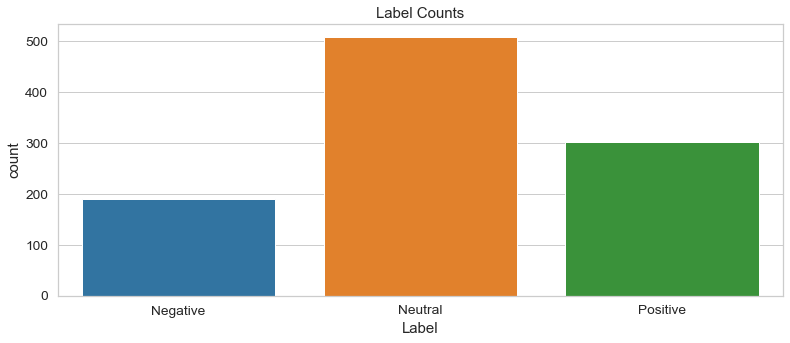

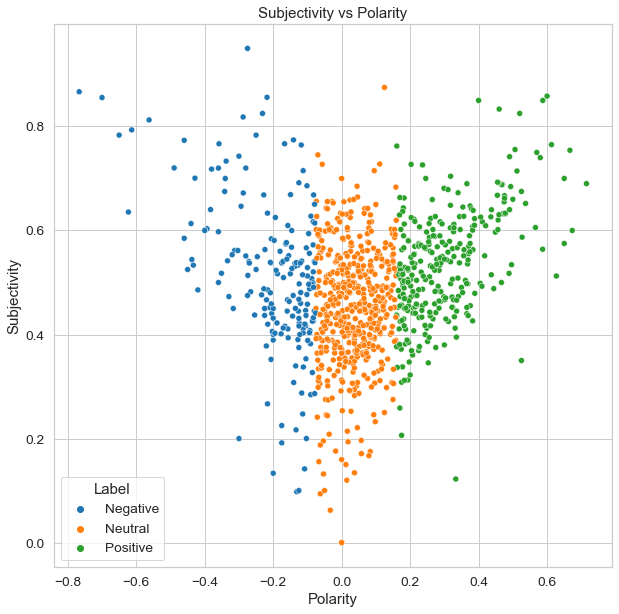

In [30]:
# Change the datatype as "category"
df["Label"] = df["Label"].astype("category")

# Visualize the Label counts
sns.countplot(df["Label"])
plt.title("Label Counts")

plt.show()

# Visualize the Polarity scores
plt.figure(figsize = (10, 10)) 
sns.scatterplot(x="Polarity", y="Subjectivity", hue="Label", data=df)
plt.title("Subjectivity vs Polarity")
plt.show()

### Redo WordCloud for 'Negative' reviews

In [31]:
column_uniques = df['Label'].unique() #extract all the values in column'Label' into an Array 
dn = df[df['Label']==column_uniques[0]] #create a datafram by 'Negative' 
dp = df[df['Label']==column_uniques[1]] #create a datafram by 'Positive' 
dna = df[df['Label']==column_uniques[2]] #create a datafram by 'Positive' 

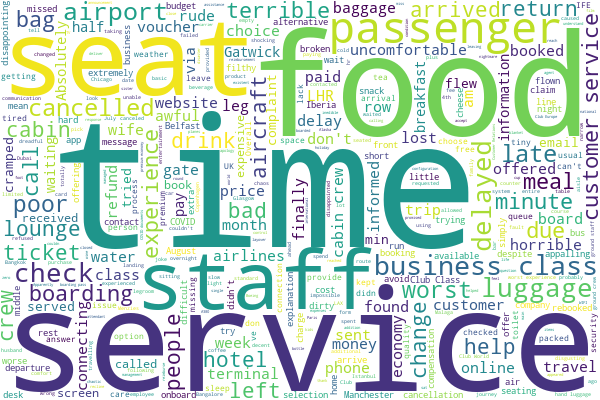

In [32]:
# Join the different processed titles together.
long_string2 = ','.join(list(dn['R_processed'].values))

# Create a WordCloud object
wordcloud2 = WordCloud(background_color="white", width =600,height = 400, stopwords= swords, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud2.generate(long_string2)
# Visualize the word cloud
wordcloud2.to_image()

In [33]:
# Fit and transform the processed titles
count_data2 = count_vectorizer.fit_transform(dn['R_processed'])
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data2)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
seat food return service late cancelled experience class arrived received

Topic #1:
staff service check customer luggage covid baggage cabin food rude

Topic #2:
service class business time staff airport luggage delayed check boarding

Topic #3:
service food seat class aircraft worst business cabin delayed poor

Topic #4:
crew seat ground people late breakfast help experience due meal


### Redo WordCloud for 'Positive' reviews

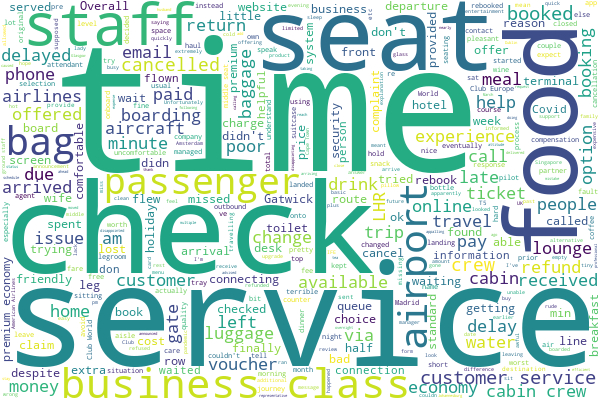

In [34]:
# Join the different processed titles together.
long_string3 = ','.join(list(dp['R_processed'].values))

# Create a WordCloud object
wordcloud3 = WordCloud(background_color="white", width =600,height = 400, stopwords= swords, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud3.generate(long_string3)
# Visualize the word cloud
wordcloud3.to_image()

In [38]:
# Fit and transform the processed titles
count_data3 = count_vectorizer.fit_transform(dp['R_processed'])
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data3)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
customer service check airport staff seat time booked ticket booking

Topic #1:
service cancelled customer booked call airport refund travel time check

Topic #2:
cabin crew service seat time food staff meal business class

Topic #3:
class business service seat economy food time check crew boarding

Topic #4:
service staff food bag customer luggage business class arrived lhr


### Redo WordCloud for 'Neutral' reviews

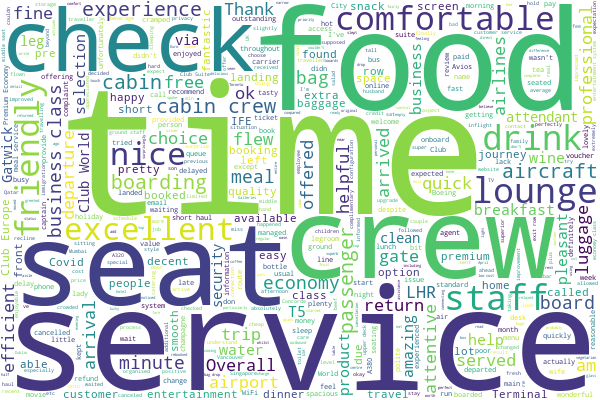

In [39]:
# Join the different processed titles together.
long_string4 = ','.join(list(dna['R_processed'].values))

# Create a WordCloud object
wordcloud4 = WordCloud(background_color="white", width =600,height = 400, stopwords= swords, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud4.generate(long_string4)
# Visualize the word cloud
wordcloud4.to_image()

In [40]:
# Fit and transform the processed titles
count_data4 = count_vectorizer.fit_transform(dna['R_processed'])
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data4)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
crew service cabin excellent economy food friendly premium time experience

Topic #1:
food crew time cabin service staff drinks seat comfortable luggage

Topic #2:
seat service cabin crew food time check friendly boarding economy

Topic #3:
service time food class lounge economy crew business seat staff

Topic #4:
service food time check class experience board business crew staff
